# Honolulu, Hawaii Vacation
25 May to 3 June, 2017

In [1]:
#To draw plots inline - not zoomable
%matplotlib inline

#import style library
from matplotlib import style

#Set the style
style.use('fivethirtyeight')

# importing matplotlib module 
import matplotlib.pyplot as plt

In [2]:
#numerical mathematics library - needed for matplotlib
import numpy as np

#Library of tools for data manipulation and analysis
import pandas as pd

In [3]:
#a class which allows maninpulation of the hours, minutes, seconds and milliseconds format
    #https://www.guru99.com/date-time-and-datetime-classes-in-python.html
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

# automatically generates mapped classes and relationships from a database schema,
from sqlalchemy.ext.automap import automap_base

# establishes all conversations with the database and represents a “holding zone” 
from sqlalchemy.orm import Session

# ability to create an engine which connects to the database
from sqlalchemy import create_engine, func, inspect

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [14]:
# Using the inspector to print the column names within the 'measurement' table and its types
Mcolumns = inspector.get_columns('Measurement')
for column in Mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Using the inspector to print the column names within the 'station' table and its types
Scolumns = inspector.get_columns('Station')
for column in Scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Listing the tables in the database
    #https://www.chrisnicoll.net/2020/02/exploring-an-sqlite-database-from-jupyter-notebook/
#engine.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

In [23]:
# Query Records in the the Database
measurementcheck = engine.execute("SELECT * FROM measurement LIMIT 10")

for record in measurementcheck:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [25]:
#Inspecting the columns in a measurement table
#for row in engine.execute("PRAGMA table_info(measurement)"):
#    print(row)

In [26]:
stationcheck = engine.execute("SELECT * FROM station LIMIT 10")

for record in stationcheck:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [28]:
#Inspecting the columns in a station table
#for row in engine.execute("PRAGMA table_info(station)"):
#    print(row)

In [ ]:
#Create measurement dataframe using SQL query
conn = engine.connect()
measurement_df= pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

In [ ]:
#Create station dataframe using SQL query
station_df= pd.read_sql("SELECT * FROM station", conn)
station_df.head()

In [29]:
# reflect an existing database into a new model
    ## Declare a Base using `automap_base()`
Base = automap_base()

In [30]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# We can view all of the classes that automap found
    # Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
    # Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [35]:
# To check data -  Display the Measurement row's columns and data in dictionary format
#Mfirst_row = session.query(Measurement).first()
#Mfirst_row.__dict__

In [ ]:
# Display the Station row's columns and data in dictionary format
#Sfirst_row = session.query(Station).first()
#Sfirst_row.__dict__

# Exploratory Climate Analysis

It’s possible to query a database using more SQL:

data = engine.execute("SELECT date, prcp FROM BaseballPlayer")

or more Python:

players = session.query(BaseballPlayer)

for player in players:

print(player.name_given)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

    # Calculate the date 1 year ago from the last data point in the database
        #https://www.sqlshack.com/dateadd-sql-function-introduction-and-overview/
        #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-

In [48]:
# Latest Date
lastdatex = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdatex

('2017-08-23')

In [55]:
## To enable month and year calculations
#from dateutil.relativedelta import *

In [54]:
# date 1 year ago from lastdatex
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#lastdate = engine.execute('SELECT MAX(date)FROM Measurement').fetchall()
#lastdate

In [60]:
#lastyear  = (lastdatex - relativedelta(years=1))
#print(f"The date one year before the last data point is {lastyear}")

#lastyear  = (lastdatedt - relativedelta(years=1)).strftime("%d/%m/%Y")
#print(f"The date one year before the last data point is {lastyear}")

In [61]:
    #Find last date in table
#lastdate = engine.execute('SELECT MAX(date)FROM Measurement').fetchall()
#lastdatedt = dt.date(2017, 8, 23)
#lastdatedtStr = lastdatedt.strftime("%d/%m/%Y")
#print(f"The latest date in the data provided is {lastdatedtStr}")

In [62]:
#testubg datetime (dt)
#dt.date.today()

In [63]:
#date = lastdate[0]
#date

In [64]:
#Convert lastdate to datetime(dt)
#x = pd.to_datetime(date, format = '%Y-%m-%d')
#print(x)

#y = x.strftime("%d-%m-%Y")
#print(y)


In [65]:
#x.year

In [66]:
#The date 1 year ago
    #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-
    #prev_year_date  = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#lastyear  = (lastdatedt - relativedelta(years=1)).strftime("%d/%m/%Y")
#print(f"The date one year before the last data point is {lastyear}")



#y + relativedelta(years=-1)
#dtime = dt.date(2019, 10, 20)

In [67]:
# Calculate the date 1 year ago from the last data point in the database
    #https://www.sqlshack.com/dateadd-sql-function-introduction-and-overview/
    #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-

#30days ahead
#delta = dt.timedelta(days=30)
#print(x + delta)

#1 Month ahead
#print(x + relativedelta(months=+1))


#yearago = engine.execute('SELECT DATEADD(YY,-3, '2017-08-23'')

#365 days abck
#delta = dt.timedelta(days=-365)
#print(x + delta)



In [68]:
# Perform a query to retrieve the data and precipitation scores
#SQL query - Select only the `date` and `prcp` values.

#prcp = engine.execute("""SELECT date, prcp FROM Measurement
#                     WHERE date between '2016-08-23' AND '2017-08-23'
#                     """).fetchall()
#len(prcp)

In [106]:
# Perform a query to retrieve the data and precipitation scores
#Pandas query - Select only the `date` and `prcp` values.

        #results = session.query(Measurement.date, Measurement.prcp).\
        #    order_by(Emoji.score.desc()).all())
        # Had to remove the .all() for dataframe to work



precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
        filter(Measurement.date <= '2017-08-23')



precip[:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [135]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe/36257640
#pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind) 
precip_df = pd.read_sql(precip.statement,session.bind).rename(columns={"date":"Date", "prcp":"Precipitation"})

precip_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [137]:
#set the index to the date column
precipdate = precip_df.set_index("Date")
precipdate

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [138]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#prcp_df = pd.read_sql("""SELECT date AS Date, prcp As Precipitation FROM Measurement
#                     WHERE date between '2016-08-23' AND '2017-08-23'
#                     """, conn)
#prcp_df

In [139]:
# Sort the dataframe by date
precipdate = precipdate.sort_index()
precipdate

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data
    #Jupyter has a nice feature that automatically converts long outputs into a box with a scrollbar. 
    #Unfortunately many times you don’t actually want it, especially when you want to compare several plots.
    #One way to disable the feature is to put the following in a separate cell
    #and run it before you run the cell that generates long output
    #https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
%%javascript
IPython.OutPutArea.prototype._should_scroll = function(lines) {
    return false;
}

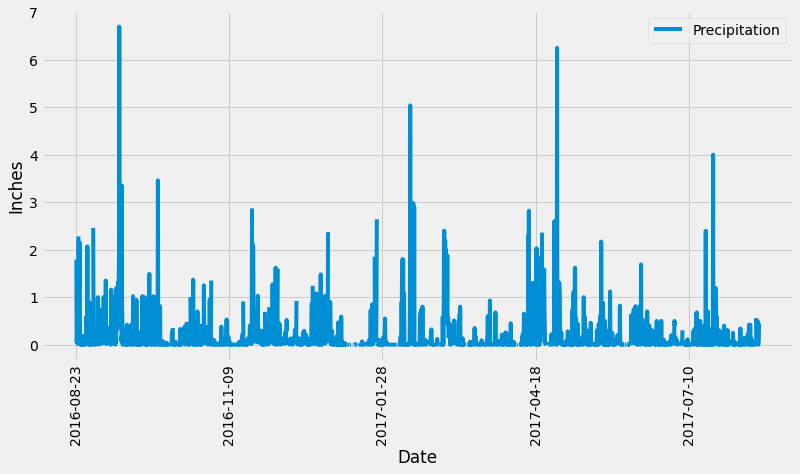

In [143]:
#plt.figure(figsize=(20,20))

precipdate.plot(figsize=(12,6))
#plt.legend(["Precipitation"]);
plt.xticks(rotation=90)
#plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipdate.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [173]:
#Check total count of station rows
session.query(Station.station).count()

9

In [174]:
# Design a query to show how many stations are available in this dataset?
    #https://docs.sqlalchemy.org/en/13/orm/query.html
    #session.query(func.count(distinct(User.name)))

# count distinct "name" values
from sqlalchemy import distinct

stationcount = session.query(func.count(distinct(Station.station))).all()
stationcount

[(9)]

In [227]:
# What are the most active stations? (i.e. what stations have the most rows)?


In [228]:
#TEST counting all rows    
session.query(Measurement.station).count()

19550

In [229]:
#TEST Joining

#join tables using station

    # This JOINs the data in the two tables together into a single dataset (here in the form of a tuple)
#joina = [Measurement.station, Station.station, Station.name, Measurement.date]
#joinaquery = session.query(*joina).filter(Measurement.station == Station.station).all()
#test data
#print(len(joinaquery))
#joinaquery[:15]


#sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
#same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

#for record in same_sporder:
#    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
#    print(
#        f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
#        f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

In [268]:
    #groupby station
    #count by station

#uniquecount = session.query(*joina, func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Measurement.station).all()
#uniquecount

#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()



In [240]:
   #sortby count (Descending)

#uniquecountorder = session.query(*joina, func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

#order_by(Emoji.score.desc()).all()
#uniquecountorder

In [ ]:
#--------------

In [235]:
    #join tables using station - Need columns M.station and S.name as I want to idenitfy the station namd

    # This joins the data in the two tables together into a single dataset (here in the form of a tuple)
    #This actually creates a list of each rown in table A for each row in table B
station_name = [Measurement.station, Station.name]

    #This base query then reduces the above list to inlcude only rows were the filter is true
stationnamejoin = session.query(*station_name).filter(Measurement.station == Station.station).all()

    #test data to see if matches counting all rows and elevant values
print(len(stationnamejoin))
stationnamejoin[:15]

    #Sample code
    #sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
    #same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

    #for record in same_sporder:
    #    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
    #    print(
    #        f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
    #        f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

19550


[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US')]

In [236]:
    #Trialling building on case query to count all rows - gives total does not include row
stationnamecount = session.query(*station_name).filter(Measurement.station == Station.station).count()
stationnamecount

19550

In [237]:
    #count by station
    #Trailling building on case to use func.count all - includes row with total count
stationnametotal = session.query(*station_name, func.count(Measurement.station)).filter(Measurement.station == Station.station).all()
stationnametotal

[('USC00519397', 'WAIKIKI 717.2, HI US', 19550)]

In [239]:
    #groupby station - to get totals for each station
    #Sample code
    #session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()


stationnameuniquecount = session.query(*station_name, func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Measurement.station).all()
stationnameuniquecount






[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511),
 ('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)]

In [259]:
    #sortby count (Descending)
    #Samnple code: order_by(Emoji.score.desc()).all()

stationnameuniquecountdesc = session.query(*station_name, func.count(Measurement.station))\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

stationnameuniquecountdesc

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [267]:
#  Which station has the highest number of observations?
print(f"The station with the highest number of observations ({stationnameuniquecountdesc[0][2]}) is {stationnameuniquecountdesc[0][1]}")

The station with the highest number of observations (2772) is WAIHEE 837.5, HI US


In [ ]:
# List the stations and the counts in descending order.

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
#Do something to close session